### Speciate multiple samples

For this demo, water chemistry for multiple samples is provided in the input file 'input_example_wrm.csv'.

In [1]:
import AqEquil
ae = AqEquil.AqEquil()

In [2]:
# perform a speciation calculation with the default WORM database 'wrm'
speciation = ae.speciate(input_filename="input_example_wrm.csv",
                         exclude=["Year", "Area"],
                         db='wrm',
                         report_filename="report.csv",
                         delete_generated_folders=True)



Preprocessing done! Took 0.1 seconds.

Calling EQ3 on Crater.Hills.Geyser.3i using wrm
Calling EQ3 on Gas.Crack.3i using wrm
Calling EQ3 on Spray.Geyser.Source.3i using wrm
Calling EQ3 on Bison.Pool.3i using wrm
Calling EQ3 on Snail.3i using wrm
Calling EQ3 on Ambergris.3i using wrm
Calling EQ3 on MLS.Source.3i using wrm
Now processing EQ3 output files...

Processing EQ3 output for Ambergris

Processing EQ3 output for Bison Pool

Processing EQ3 output for Crater Hills Geyser

Processing EQ3 output for Gas Crack

Processing EQ3 output for MLS Source

Processing EQ3 output for Snail

Processing EQ3 output for Spray Geyser Source

Finished processing EQ3 output files...

Now processing mass contribution data...

Processing mass contribution of basis species in Ambergris...

Processing mass contribution of basis species in Bison Pool...

Processing mass contribution of basis species in Crater Hills Geyser...

Processing mass contribution of basis species in Gas Crack...

Processing mass 

### Accessing and visualizing results of a speciation calculation

In [3]:
# summarize speciation results in a single report
speciation.report

Sample,Year,Area,pH,Temperature,HCO3-_(input),O2_(input),HS-_(input),SiO2_(input),METHANE_(input),H2_(input),...,O2/H2O,%CI of mean,%CI of total,Charge imbalance,IS (molal),Mean charge,Sigma(mz) anions,Sigma(mz) cations,Total charge,stoichiometric IS (molal)
,,,pH,degC,Molality,Molality,Molality,Molality,Molality,Molality,...,Eh_volts,%,%,eq/kg.H2O,molality,eq/kg.H2O,eq/kg.H2O,eq/kg.H2O,eq/kg.H2O,molality
Bison Pool,2014,YNP,7.640,92.2,0.005690,0.000009,0.000003,0.006270,0.000000e+00,0.000000e+00,...,0.586,0.0163,0.0081,0.000002,0.013980,0.013791,-0.013790,0.013792,0.027581,0.014060
Spray Geyser Source,2012,YNP,8.021,92.9,0.005410,0.000003,0.000004,0.005030,0.000000e+00,0.000000e+00,...,0.548,0.2970,0.1485,0.000038,0.012987,0.012738,-0.012719,0.012757,0.025476,0.013064
Crater Hills Geyser,2012,YNP,3.327,89.0,0.000117,0.000000,0.000017,0.014400,0.000000e+00,0.000000e+00,...,NaN,2.2713,1.1357,0.000756,0.037525,0.033301,-0.032923,0.033680,0.066603,0.042061
Ambergris,2011,Iceland,8.452,81.5,0.000983,0.000053,0.000030,0.002480,8.900000e-09,3.970000e-08,...,0.567,20.3272,10.1636,0.000815,0.004743,0.004010,-0.003603,0.004418,0.008021,0.004874
MLS Source,2007,YNP,7.850,94.0,0.006785,0.000007,0.000002,0.004200,0.000000e+00,0.000000e+00,...,0.564,1.2445,0.6222,0.000224,0.018408,0.018009,-0.017897,0.018121,0.036018,0.018527
Gas Crack,2014,Oman,11.670,32.2,0.000033,0.000034,0.000006,0.000001,1.750000e-05,2.261290e-04,...,0.493,0.9553,0.4777,0.000209,0.023987,0.021833,-0.021729,0.021937,0.043666,0.024555
Snail,2014,Oman,11.650,23.8,0.000042,0.000009,0.000007,0.000010,1.371360e-04,2.471160e-04,...,0.512,0.8700,0.4350,0.000080,0.010838,0.009217,-0.009176,0.009257,0.018433,0.011061


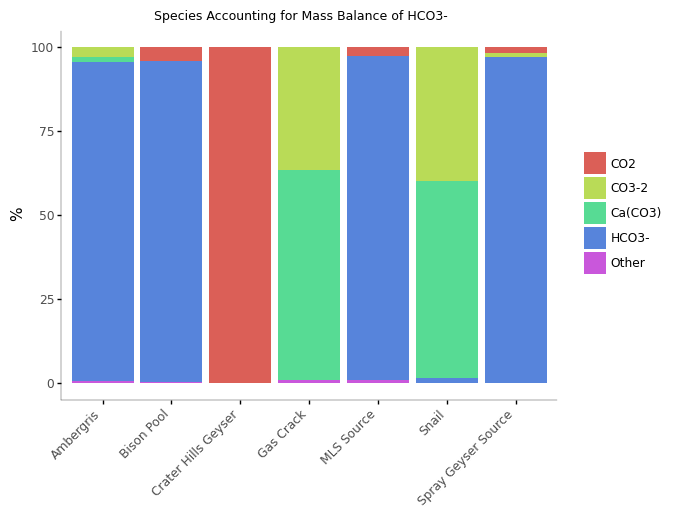

<ggplot: (8761837886507)>

In [4]:
# visualize basis species contributions to aqueous species by mass
speciation.plot_mass_contribution("HCO3-")

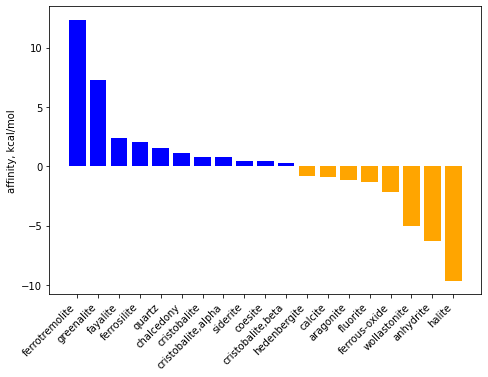

In [5]:
# visualize mineral saturation states in a sample with plot_mineral_saturation()
speciation.plot_mineral_saturation("Bison Pool")

/opt/conda/envs/python3/lib/python3.7/site-packages/AqEquil/AqSpeciation.py:423: RuntimeWarning: All-NaN axis encountered


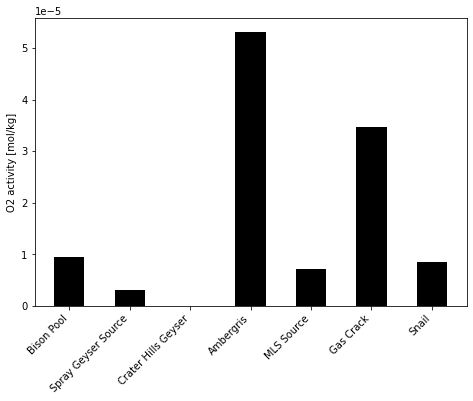

In [6]:
# create a barplot for a single variable in the report with barplot()
speciation.barplot("O2")

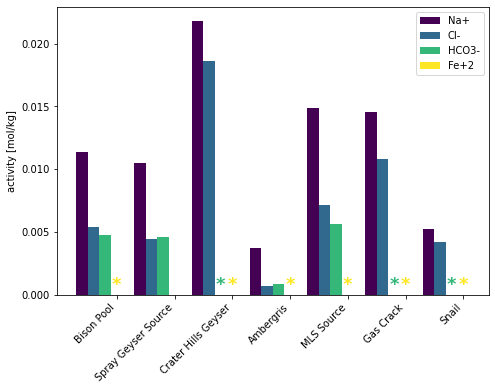

In [7]:
# list multiple variables in the report to create a grouped barplot
speciation.barplot(["Na+", "Cl-", "HCO3-", "Fe+2"])

In [8]:
# look up specific columns in the report with lookup()
speciation.lookup(["Na+", "Cl-", "HCO3-", "Fe+2"])

Sample,Cl-,Fe+2,HCO3-,Na+
,log_activity,log_activity,log_activity,log_activity
Bison Pool,-2.2645,-6.4395,-2.3221,-1.9437
Spray Geyser Source,-2.3502,NaN,-2.3355,-1.9774
Crater Hills Geyser,-1.7302,-5.3450,-6.9104,-1.6612
Ambergris,-3.1549,-8.2863,-3.0654,-2.4305
MLS Source,-2.1433,-7.4704,-2.2472,-1.8286
Gas Crack,-1.9645,-14.2881,-6.5521,-1.8378
Snail,-2.3783,-13.7220,-6.2581,-2.2818


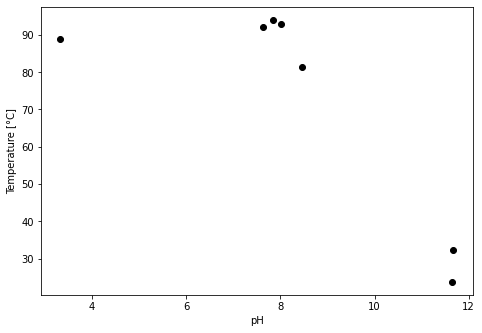

In [9]:
# plot two variables in the report against each other with scatterplot()
speciation.scatterplot("pH", "Temperature")

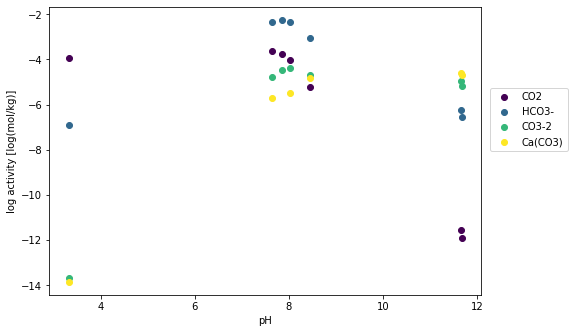

In [10]:
# Plot multiple dependent variables by providing scatterplot() with a list.
# Change the legend coordinates with legend_loc.
speciation.scatterplot("pH", ["CO2", "HCO3-", "CO3-2", "Ca(CO3)"], legend_loc=(1.02, 0.5))

In [11]:
# look up speciation results for a single sample
sample = "Ambergris"
data_type = "aq_distribution"
speciation.sample_data[sample][data_type]

,molality,log_molality,log_gamma,log_activity
Na+,4.038900e-03,-2.393700,-0.0368,-2.430500
SiO2,1.945300e-03,-2.711000,0.0000,-2.711000
HCO3-,9.323700e-04,-3.030400,-0.0350,-3.065400
Cl-,7.602000e-04,-3.119100,-0.0358,-3.154900
SO4-2,5.709100e-04,-3.243400,-0.1424,-3.385900
...,...,...,...,...
H2N2O2,1.377700e-62,-61.860800,0.0000,-61.860800
S2O6-2,3.142300e-63,-62.502800,-0.1424,-62.645200
OCN-,1.447900e-66,-65.839300,-0.0358,-65.875000
S2O5-2,7.787700e-88,-87.108600,-0.1424,-87.251000


In the cell above, substitute any of the following keys for `aq_distribution` above to examine calculated results.

- `filename` : name of the raw EQ3 output file.
- `name` : name of the sample.
- `temperature` : temperature.
- `pressure` : pressure.
- `logact_H2O` : log activity of water (log mol/kg).
- `H2O_density` : density of water (g/ml).
- `H2O_molality` : molality of water.
- `H2O_log_molality` : log molality of water.
- `aq_distribution` : distribution of aqueous species after speciation.
- `mass_contribution` : major species by contribution to aqueous mass balances.
- `mineral_sat` : saturation states of pure solids.
- `redox` : aqueous redox reaction potentials.
- `charge_balance` : charge balance and ionic strength information.

### Tips and Tricks

**View entire tables** (instead of the first and last few entries) in a notebook by pasting the code below into a cell and running it. This will tell the notebook to show entire tables.

```python
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
```

You can undo this with:
```python
pd.reset_option("display")
```

**View the documentation** of a function with a question mark. For instance, get help with the scatterplot function and see a description of all the parameters it takes:

```python
speciation.scatterplot?
```